<a href="https://colab.research.google.com/github/shin-ing-bot/hello_Test/blob/main/data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Mall_Customers.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#성별 비율
x = df.groupby(['Gender'])['Gender'].count()
x

,Gender
Gender,
Female,112
Male,88


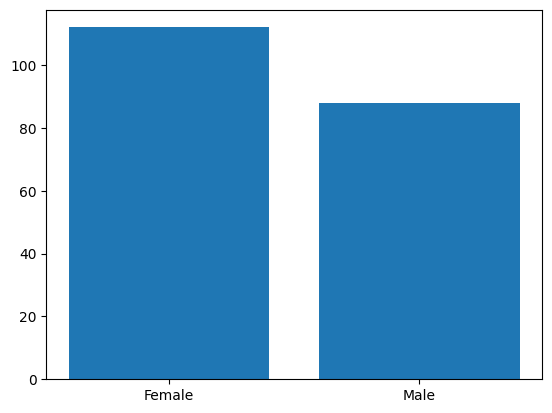

In [ ]:
plt.bar(x.index, x.values)
plt.show()

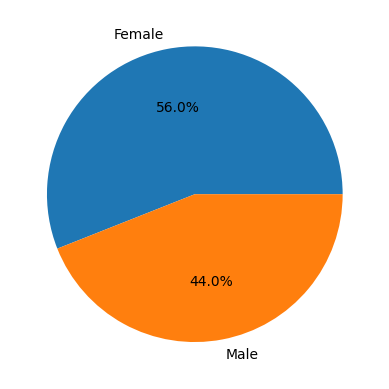

In [ ]:
plt.pie(x.values, labels=x.index, autopct='%1.1f%%')
plt.show()

In [ ]:
# 나이 영역별 구분, 스코어의 분포를 시각화
bins = [18, 22, 50, 70]
labels = ['Young', 'Adult', 'Senior']
df['Age Range'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Range
0,1,Male,19,15,39,Young
1,2,Male,21,15,81,Young
2,3,Female,20,16,6,Young
3,4,Female,23,16,77,Adult
4,5,Female,31,17,40,Adult


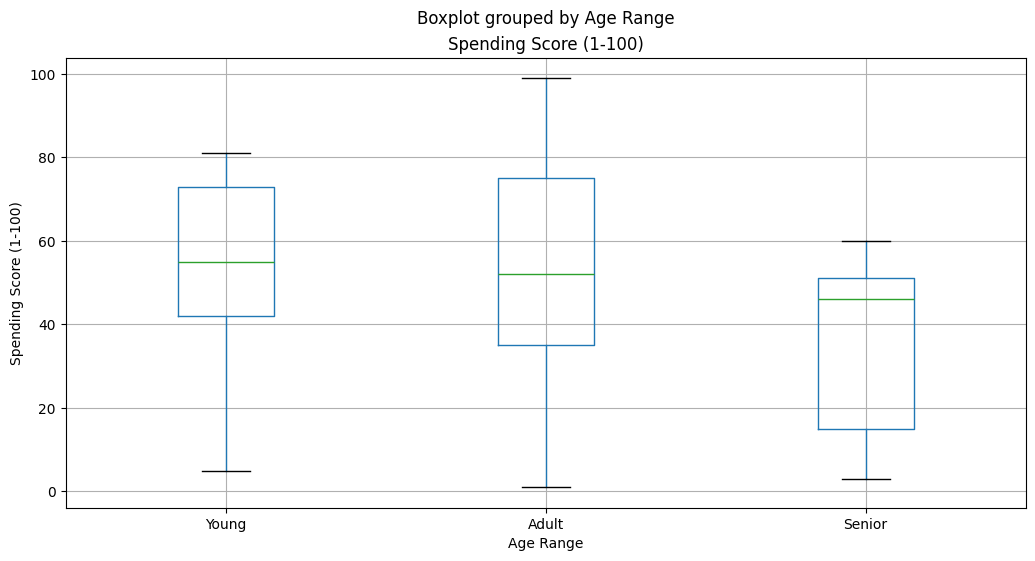

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(12, 6))
df.boxplot(column='Spending Score (1-100)', by='Age Range', ax=ax)
ax.set_xlabel('Age Range')
ax.set_ylabel('Spending Score (1-100)')
plt.show()

In [ ]:
def age_band(num):
    for i in range(1, 100):
      if num < 10*i : return f'{(i-1) * 10} ~ {i-10}'

df['age_band'] = df['Age'].apply(age_band)

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Range,age_band
0,1,Male,19,15,39,Young,10 ~ -8
1,2,Male,21,15,81,Young,20 ~ -7
2,3,Female,20,16,6,Young,20 ~ -7
3,4,Female,23,16,77,Adult,20 ~ -7
4,5,Female,31,17,40,Adult,30 ~ -6


In [ ]:
mf = df.groupby(['Gender']) ['age_band'].value_counts().unstack().sort_index()

In [ ]:
mf

age_band,10 ~ -8,20 ~ -7,30 ~ -6,40 ~ -5,50 ~ -4,60 ~ -3,70 ~ -2
Gender,,,,,,,
Female,3.0,26.0,37.0,24.0,14.0,8.0,NaN
Male,9.0,17.0,24.0,15.0,11.0,10.0,2.0


In [ ]:
female_mf = mf.loc['Female']
male_mf = mf.loc['Male']

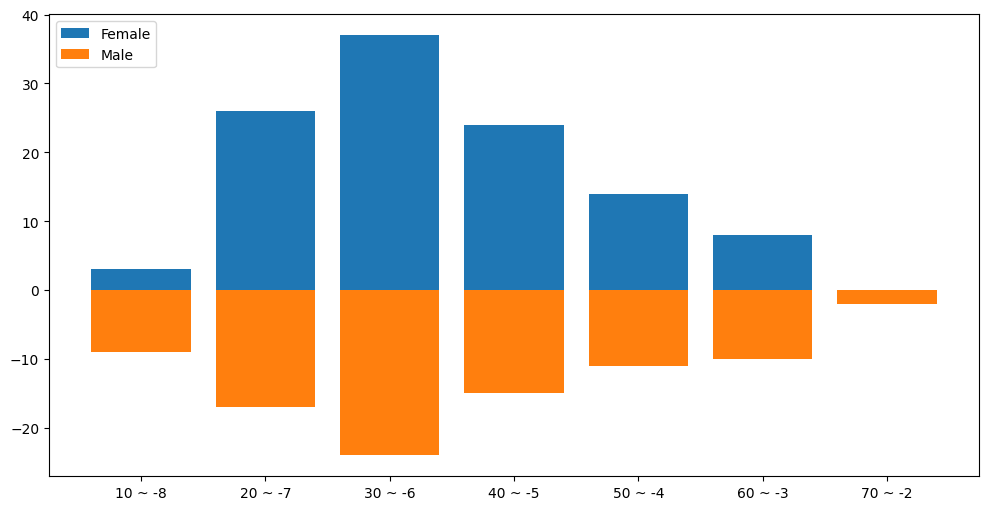

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
ax.bar(female_mf.index, female_mf.values, label='Female')
ax.bar(male_mf.index, -male_mf.values, label='Male')
ax.legend()
plt.show()